In [69]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
import seaborn as sns
import io
from datetime import datetime
import re


In [23]:
df = pd.read_csv("../Final/US_Accidents_Dec21_updated.csv")

In [24]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


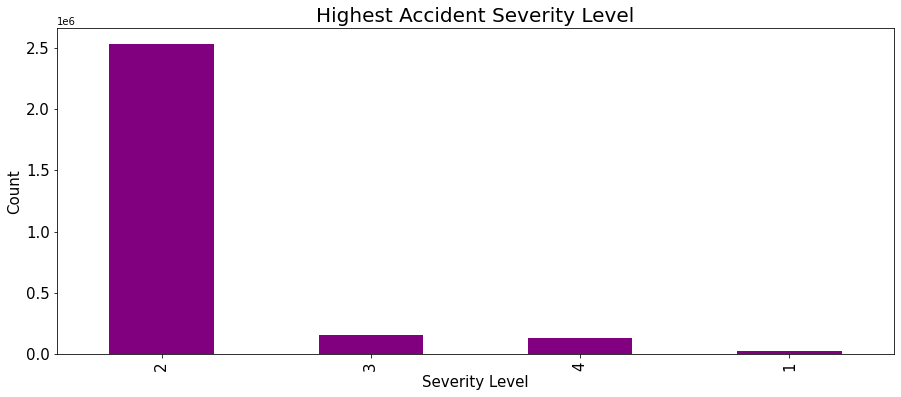

In [26]:
plt.figure(figsize=(15,6))
severity_level = df.Severity.value_counts().plot(kind='bar',color='purple')
severity_level.set_xlabel('Severity Level', fontsize=15)
severity_level.set_ylabel('Count', fontsize=15)
severity_level.set_title('Highest Accident Severity Level', fontsize=20)
plt.xticks(fontsize= 15) 
plt.yticks(fontsize= 15) 
plt.show()

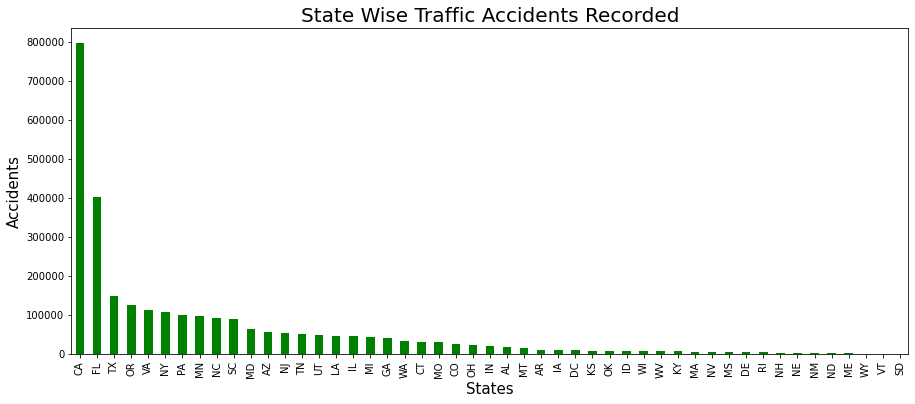

In [28]:
plt.figure(figsize=(15,6))
state_accidents = df.State.value_counts().plot(kind='bar',color='green')
state_accidents.set_xlabel('States', fontsize=15)
state_accidents.set_ylabel('Accidents', fontsize=15)
state_accidents.set_title('State Wise Traffic Accidents Recorded', fontsize=20)
plt.show()

11682

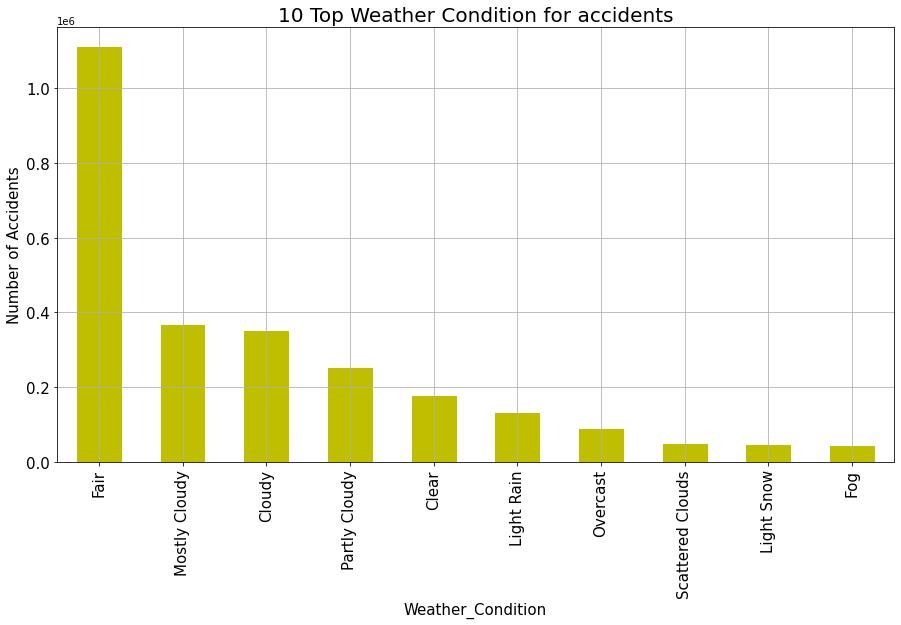

In [29]:
figure,axis =plt.subplots(figsize=(15,8))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,edgecolor='y',align='center',linewidth=3, color = 'y')
plt.xlabel('Weather_Condition',fontsize=15)
plt.ylabel('Number of Accidents',fontsize=15)
axis.tick_params(labelsize=15)
plt.title('10 Top Weather Condition for accidents',fontsize=20)
plt.grid()
len(cities)

In [41]:
###cleaninng

In [43]:
drop_irrelavent_cols = df.loc[:,['Start_Time', 'End_Time','Distance(mi)', 'Description', 'Street', 'Side', 'City', 'County',
                                 'Timezone','Country', 'Airport_Code','Weather_Timestamp','Civil_Twilight', 
                                 'Nautical_Twilight','Astronomical_Twilight',"End_Lat", "End_Lng", "Number"]]

df_clean = df.drop(drop_irrelavent_cols,axis =1)
df_clean.shape
df_clean.head()

,ID,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Month
0,A-1,3,40.108910,-83.092860,OH,43017,42.1,36.1,58.0,29.76,...,False,False,False,False,False,False,False,False,Night,2016-02-08 00:37:08
1,A-2,2,39.865420,-84.062800,OH,45424,36.9,NaN,91.0,29.68,...,False,False,False,False,False,False,False,False,Night,2016-02-08 05:56:20
2,A-3,2,39.102660,-84.524680,OH,45203,36.0,NaN,97.0,29.70,...,False,False,False,False,False,False,False,False,Night,2016-02-08 06:15:39
3,A-4,2,41.062130,-81.537840,OH,44311,39.0,NaN,55.0,29.65,...,False,False,False,False,False,False,False,False,Night,2016-02-08 06:51:45
4,A-5,3,39.172393,-84.492792,OH,45217,37.0,29.8,93.0,29.69,...,False,False,False,False,False,False,False,False,Day,2016-02-08 07:53:43


In [44]:
##renaming

In [45]:
df_clean=df_clean.rename(columns = {'Temperature(F)':'Temperature','Wind_Chill(F)':'Wind_Chill','Humidity(%)':'Humidity',
                        'Pressure(in)':'Pressure','Visibility(mi)':'Visibility','Wind_Speed(mph)':'Wind_Speed',
                        'Precipitation(in)':'Precipitation'})

In [46]:
#id as index
df_clean = df_clean.set_index('ID') 
df_clean.head()

,Severity,Start_Lat,Start_Lng,State,Zipcode,Temperature,Wind_Chill,Humidity,Pressure,Visibility,...,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Month
ID,,,,,,,,,,,,,,,,,,,,,
A-1,3,40.108910,-83.092860,OH,43017,42.1,36.1,58.0,29.76,10.0,...,False,False,False,False,False,False,False,False,Night,2016-02-08 00:37:08
A-2,2,39.865420,-84.062800,OH,45424,36.9,NaN,91.0,29.68,10.0,...,False,False,False,False,False,False,False,False,Night,2016-02-08 05:56:20
A-3,2,39.102660,-84.524680,OH,45203,36.0,NaN,97.0,29.70,10.0,...,False,False,False,False,False,False,False,False,Night,2016-02-08 06:15:39
A-4,2,41.062130,-81.537840,OH,44311,39.0,NaN,55.0,29.65,10.0,...,False,False,False,False,False,False,False,False,Night,2016-02-08 06:51:45
A-5,3,39.172393,-84.492792,OH,45217,37.0,29.8,93.0,29.69,10.0,...,False,False,False,False,False,False,False,False,Day,2016-02-08 07:53:43


In [47]:
##add mean to features
df_clean['Temperature'] = df_clean['Temperature'].fillna(df_clean['Temperature'].mean())
df_clean['Humidity'] = df_clean['Humidity'].fillna(df_clean['Humidity'].mean())
df_clean['Wind_Chill'] = df_clean['Wind_Chill'].fillna(df_clean['Wind_Chill'].mean())
df_clean['Pressure'] = df_clean['Pressure'].fillna(df_clean['Pressure'].mean())
df_clean['Wind_Speed'] = df_clean['Wind_Speed'].fillna(df_clean['Wind_Speed'].mean())
df_clean['Precipitation'] = df_clean['Precipitation'].fillna(df_clean['Precipitation'].mean())

In [48]:
##mode
df_clean['Weather_Condition'] = df_clean['Weather_Condition'].fillna(df_clean['Weather_Condition'].mode().iloc[0])
df_clean['Visibility'] = df_clean['Visibility'].fillna(df_clean['Visibility'].mode().iloc[0])
df_clean['Wind_Direction'] = df_clean['Wind_Direction'].fillna(df_clean['Wind_Direction'].mode().iloc[0])
df_clean['Sunrise_Sunset'] = df_clean['Sunrise_Sunset'].fillna(df_clean['Sunrise_Sunset'].mode().iloc[0])

In [49]:
##drop missing values
df_clean = df_clean.dropna()
df_clean.shape

(2844023, 29)

In [54]:
cat_names = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
print("Unique count of categorical features:")
for i in cat_names:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


In [55]:
##simplify weather / wind direction

df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['SW' 'CALM' 'W' 'N' 'S' 'NW' 'E' 'SE' nan 'VAR' 'NE']


In [56]:
##dropping missing values
missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
10,Number,61.290031
11,Street,0.000070
13,City,0.004815
16,Zipcode,0.046356
18,Timezone,0.128596
19,Airport_Code,0.335601
20,Weather_Timestamp,1.783125
21,Temperature(F),2.434646
22,Wind_Chill(F),16.505678
23,Humidity(%),2.568830


In [57]:
#dropping number and wind chill,   seperate percipitation values to get column with specific data (inches)

df = df.drop(['Number','Wind_Chill(F)'], axis=1)
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.00,0
1,0.02,0
2,0.02,0
3,0.00,1
4,0.01,0
5,0.00,1


In [58]:
#dropping NaN values
df = df.dropna(subset=['City','Zipcode','Airport_Code',
                       'Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'])

In [59]:
#set focus to severity and as were looking for info on serious / fatal accidents
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df = df.drop(['Severity'], axis = 1)
df.Severity4.value_counts()

0    2703313
1     130146
Name: Severity4, dtype: int64

In [60]:
#resampling for exploratory analysis
def resample(dat, col, n):
    return pd.concat([dat[dat[col]==1].sample(n, replace = True),
                   dat[dat[col]==0].sample(n)], axis=0)

In [61]:
df_bl = resample(df, 'Severity4', 50000)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 1    50000
0    50000
Name: Severity4, dtype: int64


In [70]:
weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())
weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s", weather))).tolist()
print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drifting Snow', 'Drizzle', 'Dust', 'Dust Whirls', 'Dust Whirls Nearby', 'Dust Whirlwinds', 'Duststorm', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Shower', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Nearby', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic

In [72]:
#clean missing values in types

missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
9,Street,0.000035
18,Temperature(F),2.106012
19,Humidity(%),2.240689
20,Pressure(in),1.750616
21,Visibility(mi),2.149387
22,Wind_Direction,2.264370
23,Wind_Speed(mph),5.234591
25,Weather_Condition,2.153163


In [83]:
accidents_by_cities = us_accidents['City'].value_counts()
accidents_by_cities

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

In [84]:
accidents_by_cities[:10]

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

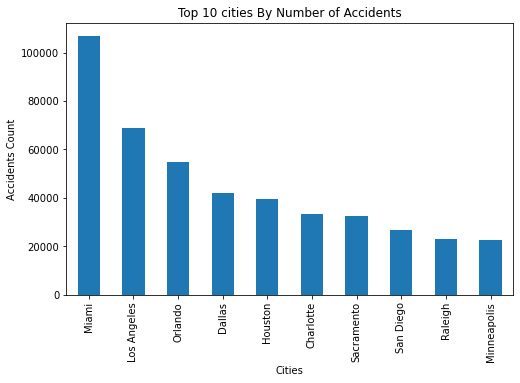

In [85]:
#Bar Chart to Visualize Top 10 cities by number of accidents

fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [86]:
#grouping  data by high and low

high_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities>=1000]
low_accident_cities = accidents_by_cities = accidents_by_cities[accidents_by_cities<1000]

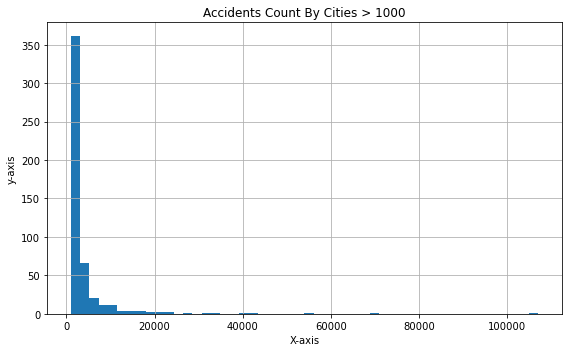

In [87]:
# Zoom in on the data distribution for cities with high accidents

fig, axs = plt.subplots(1, 1,figsize =(8, 5), tight_layout = True)

high_accident_cities.hist(bins = 50)

plt.xlabel("X-axis")
plt.ylabel("y-axis")
plt.title('Accidents Count By Cities > 1000')

plt.show()

In [88]:
# Accidents by order of severity (1 being lowest, and 4 being highest)

us_accidents.groupby('Severity').count()['ID']

Severity
1      26053
2    2532991
3     155105
4     131193
Name: ID, dtype: int64

In [89]:
# Accidents severity

accidents_severity = us_accidents.groupby('Severity').count()['ID']
accidents_severity

Severity
1      26053
2    2532991
3     155105
4     131193
Name: ID, dtype: int64

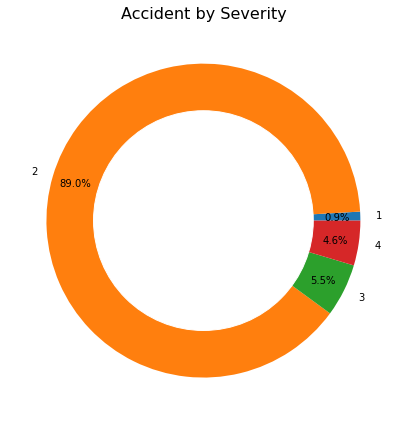

In [90]:
#visual for the severity data

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [ ]:
# above chart of data showing 4.6% being severe

In [91]:
#alter datetime formating for graphing

us_accidents['Start_Time'].dtypes
us_accidents['End_Time'].dtypes

dtype('O')

In [92]:
us_accidents = us_accidents.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
us_accidents['Start_Time'].dtypes

dtype('<M8[ns]')

In [93]:
#starting
us_accidents['Start_Time'][0]

Timestamp('2016-02-08 00:37:08')

In [94]:
#ending
us_accidents['End_Time'][0]

Timestamp('2016-02-08 06:37:08')

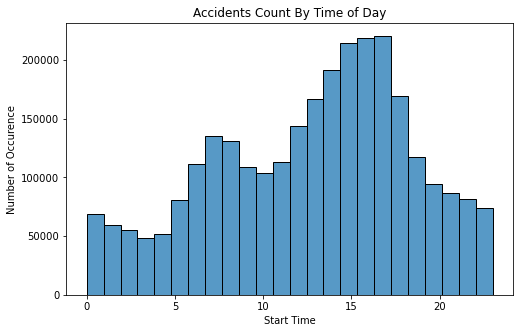

In [95]:
#occurence by time of the day

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

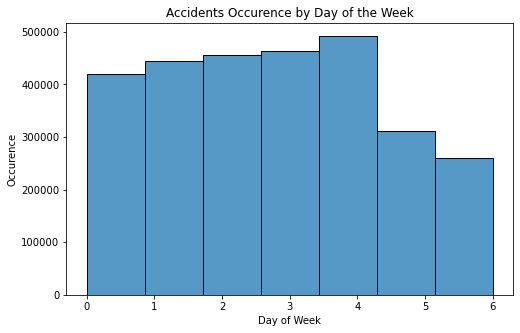

In [96]:
#by weekday

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.dayofweek, bins = 7)

plt.xlabel("Day of Week")
plt.ylabel("Occurence")
plt.title('Accidents Occurence by Day of the Week')

plt.show()

In [97]:
#variable of weekend days for next analysis

saturday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 5]
sunday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 6]

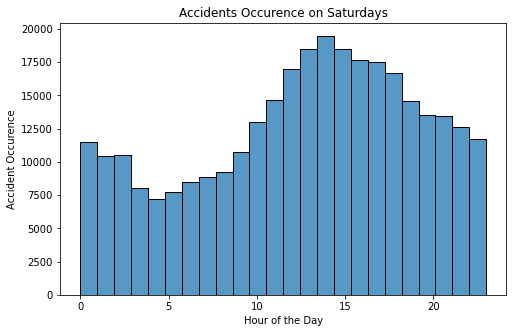

In [98]:
#difference in only weekend activity

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(saturday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Saturdays')

plt.show()

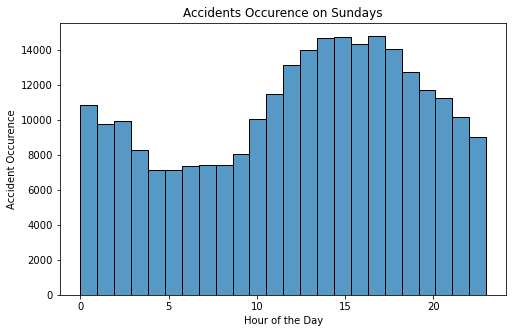

In [99]:
#figure shown for sunday

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(sunday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Sundays')

plt.show()

In [100]:
#random day for analysis
import random

In [101]:
# get random week day
weekdays_in_numbers = [0,1,2,3,4]
random_num = random.choice(weekdays_in_numbers)
random_num

3

In [102]:
#for analysis,  showing tuesday
tuesday = us_accidents[us_accidents['Start_Time'].dt.dayofweek == 1]

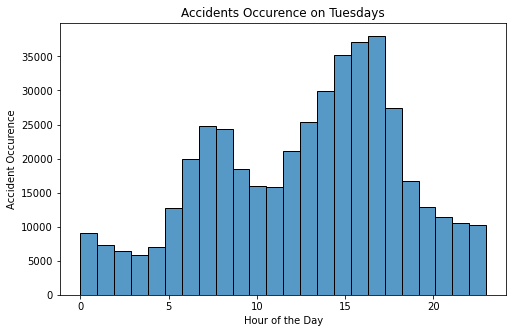

In [103]:
# Graph is similar to the general
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(tuesday['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Hour of the Day")
plt.ylabel("Accident Occurence")
plt.title('Accidents Occurence on Tuesdays')

plt.show()

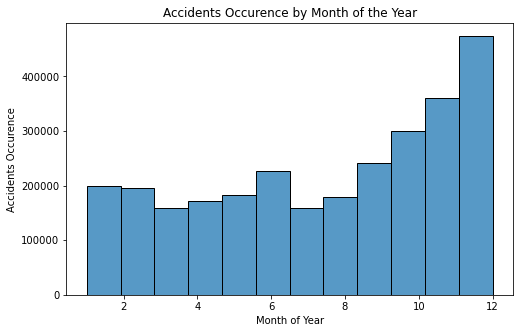

In [104]:
#additional plotting by month

fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(us_accidents['Start_Time'].dt.month, bins = 12)

plt.xlabel("Month of Year")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month of the Year')

plt.show()

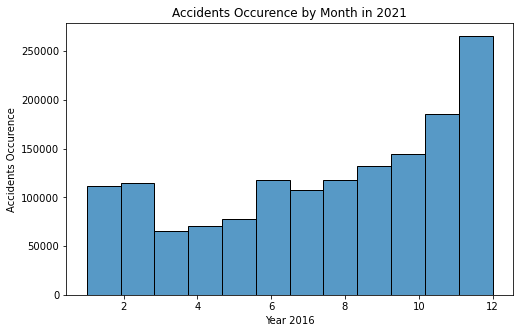

In [105]:
#showing latest year data available only by month

fig, ax = plt.subplots(figsize=(8,5))
dt_2016 = us_accidents[us_accidents['Start_Time'].dt.year==2021]
sns.histplot(dt_2016['Start_Time'].dt.month, bins = 12)

plt.xlabel("Year 2016")
plt.ylabel("Accidents Occurence")
plt.title('Accidents Occurence by Month in 2021')

plt.show()

In [106]:
#weather at time of accident

weather_conditions = us_accidents.groupby(['Weather_Condition']).count()['ID']
weather_conditions

Weather_Condition
Blowing Dust                142
Blowing Dust / Windy        148
Blowing Sand                  1
Blowing Snow                162
Blowing Snow / Windy         86
                           ... 
Volcanic Ash                  4
Widespread Dust              50
Widespread Dust / Windy      18
Wintry Mix                 3843
Wintry Mix / Windy           74
Name: ID, Length: 127, dtype: int64

In [107]:
#sorted conditions
weather_conditions.sort_values(ascending=False)

Weather_Condition
Fair                         1107194
Mostly Cloudy                 363959
Cloudy                        348767
Partly Cloudy                 249939
Clear                         173823
                              ...   
Low Drifting Snow                  1
Light Fog                          1
Mist / Windy                       1
Sand / Dust Whirls Nearby          1
Sleet / Windy                      1
Name: ID, Length: 127, dtype: int64

In [108]:
#sorted and filtered to top 20

weather_conditions.sort_values(ascending=False)[:20]

Weather_Condition
Fair                       1107194
Mostly Cloudy               363959
Cloudy                      348767
Partly Cloudy               249939
Clear                       173823
Light Rain                  128403
Overcast                     84882
Scattered Clouds             45132
Light Snow                   43752
Fog                          41226
Haze                         36354
Rain                         31044
Fair / Windy                 15195
Heavy Rain                   11824
Smoke                         7200
Light Drizzle                 7041
Thunder in the Vicinity       6944
Cloudy / Windy                6839
T-Storm                       6546
Mostly Cloudy / Windy         6297
Name: ID, dtype: int64

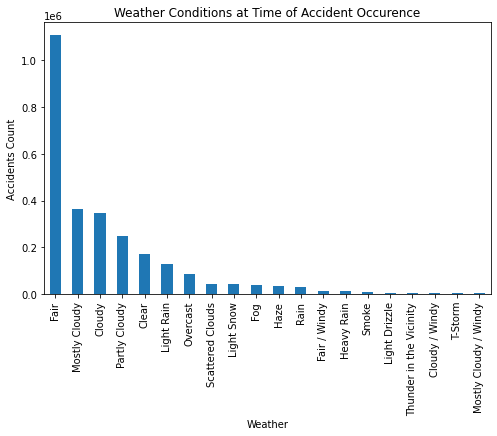

In [109]:
#bar plot visual for the weather data
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()